In [51]:
# https://github.com/astropy/astropy-workshop/blob/main/02b-OOP/intro_to_oop.ipynb
# april 25, 2025, created by pymj
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
from itertools import cycle

In [73]:
class LightCurve:
    
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name

    def plot(self, color=None, linestyle=None): #, linewidth=None, 
             #label=None):
        """ Plot the light curve """
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='.', 
                     color=color, linestyle=linestyle)#, linewidth=linewidth,
                     #label=self.name)
        plt.xlabel('Time [days]', fontsize=16)
        plt.ylabel('Flux [ergs]', fontsize=16)
        plt.legend(loc=2)

    @classmethod
    # https://www.geeksforgeeks.org/classmethod-in-python/
    def from_txt(cls, path):
        data = np.loadtxt(path)

        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2,:]
        flags = data[3,:]

        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)

    def clean(self, order=1):
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)

        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model

        self.cleaned = True
        return best_fit_model

In [38]:
# Generate new light curves
%run generate_lcs.py

<Figure size 640x480 with 0 Axes>

In [89]:
path = 'sample_lcs/lc_0.txt'
lc0 = LightCurve.from_txt(path)
lc0.name = 'LC-0'
#lc0.plot(label=lc0.name)

1.0000028851564118


/tmp/ipykernel_14195/2412382061.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=2)


True

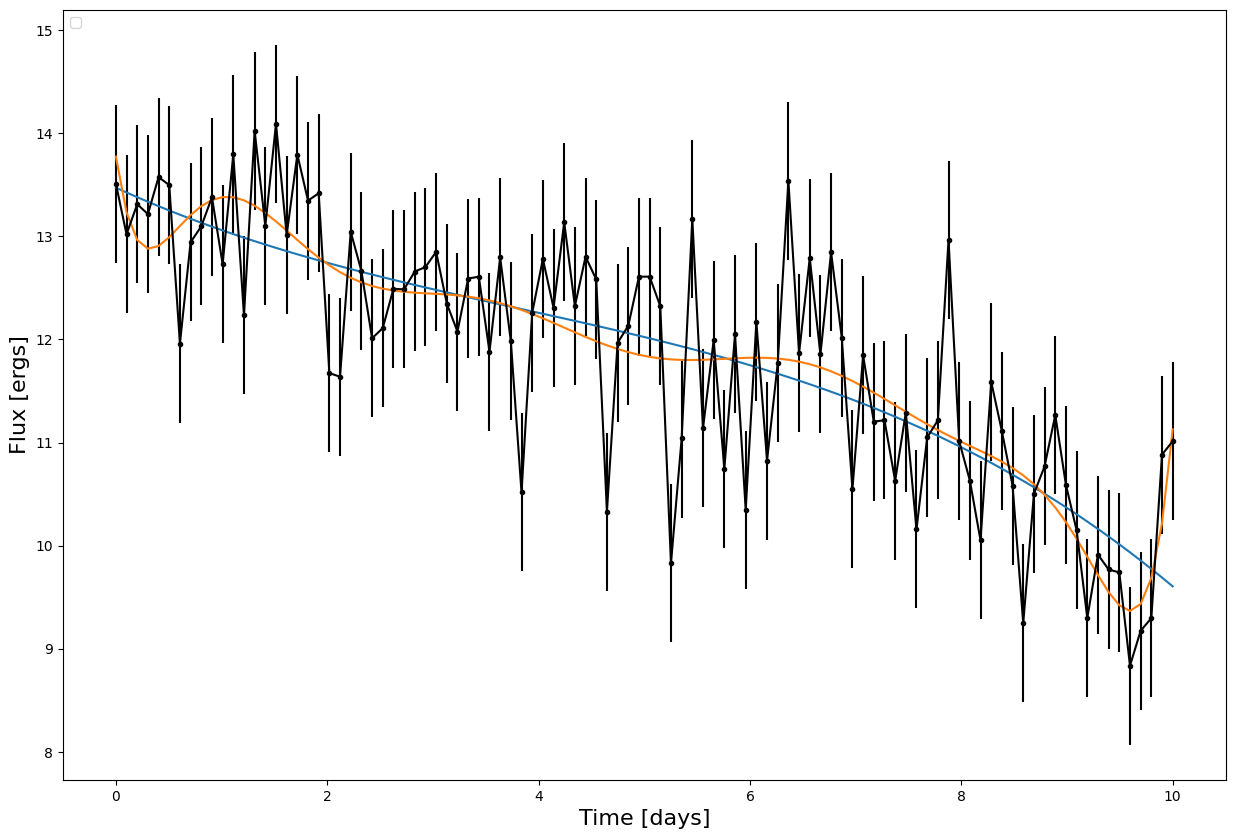

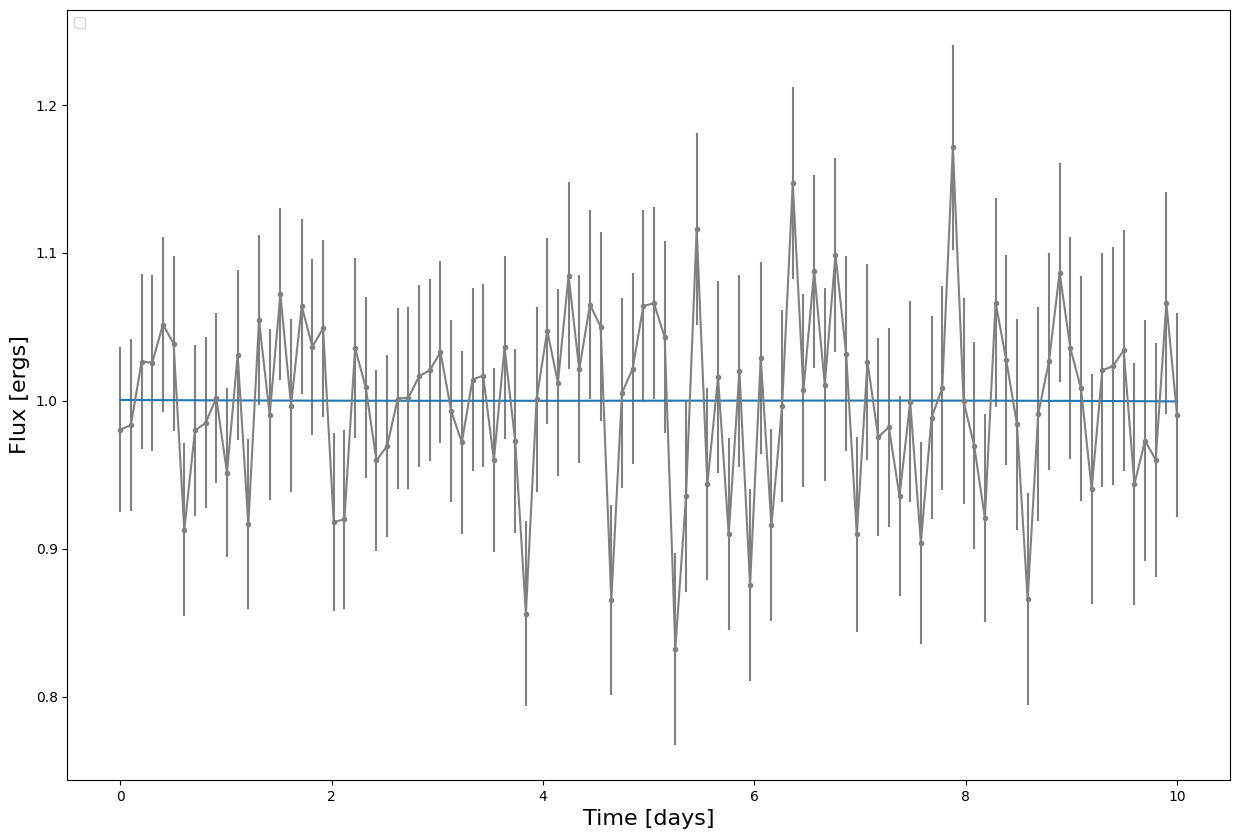

In [90]:
lc_paths = glob('sample_lcs/*.txt')
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]
c=cycle(['b', 'g', 'orange'])
c2=cycle('gray')
l=cycle('-')

plt.figure(figsize=(15,10))
# plot original light curve and 1 best-fit
for lightcurve in lightcurves[0:1]:
    lightcurve.plot('k', next(l))
    bf1=lightcurve.clean(order=3)
    plt.plot(lightcurve.times, bf1)
    print(lightcurve.fluxes.mean())

# Calculate new best-fit (of diff. degree) after reading original fluxes
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]
for lightcurve in lightcurves[0:1]:
    bf2=lightcurve.clean(order=10)
    plt.plot(lightcurve.times, bf2)

# Plot only cleaned normalized versions
plt.figure(figsize=(15,10))
for lightcurve in lightcurves[0:1]:
    bf1=lightcurve.clean(order=4)
    lightcurve.plot('gray', next(l))
    plt.plot(lightcurve.times, bf1)


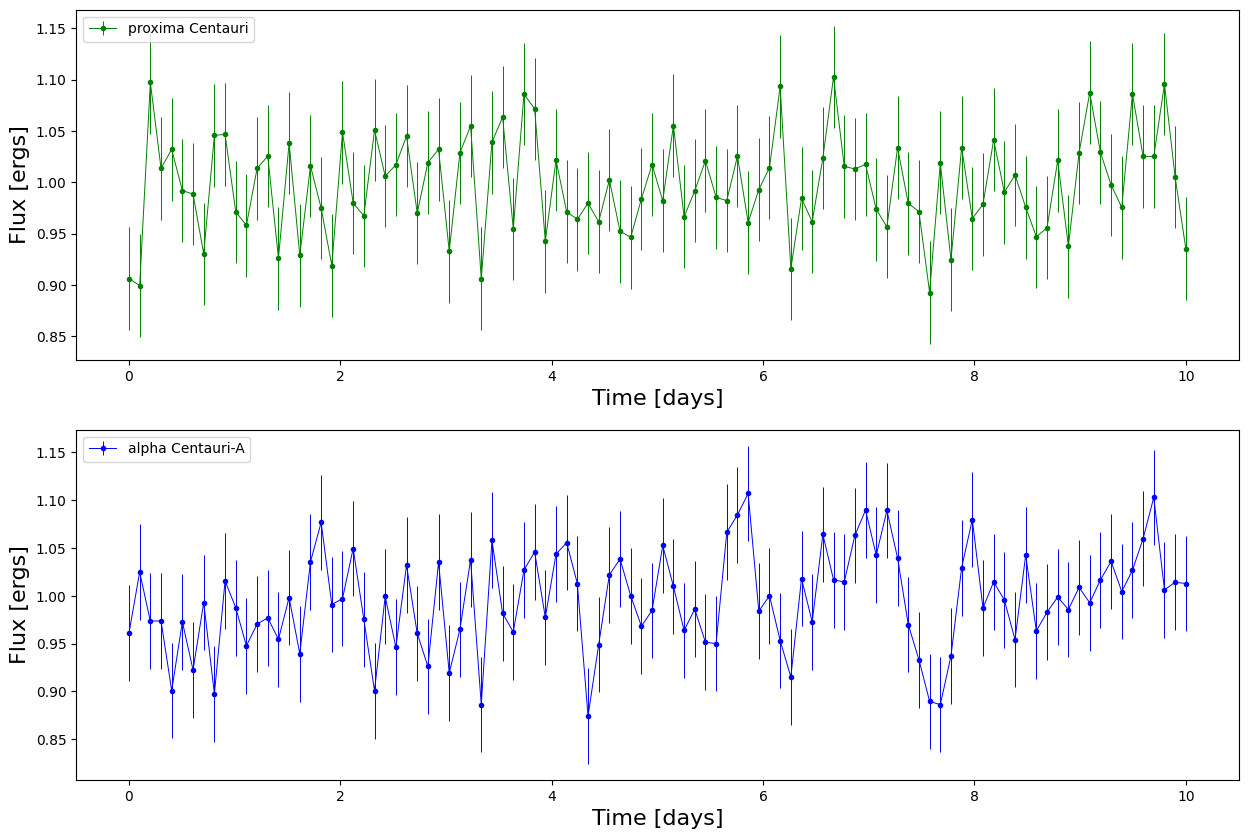

In [33]:
times = np.linspace(0, 10, 100)
sigma = 0.05
fluxes = 1 +sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0,5,len(fluxes))
name = 'proxima Centauri'

times2 = np.linspace(0, 10, 100)
sigma2 = 0.07
fluxes2 = 1 + sigma * np.random.randn(len(times))
uncertainties2 = sigma * np.ones_like(fluxes)
flags2 = np.random.randint(0,5,len(fluxes))
name2 = 'alpha Centauri-A'

prox_cen = LightCurve(times=times, fluxes=fluxes,
                      uncertainties=uncertainties, flags=flags,
                      name=name)
cen_A = LightCurve(times=times2, fluxes=fluxes2,
                      uncertainties=uncertainties2, flags=flags2,
                      name=name2)

fig=plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
prox_cen.plot('g', '-', 0.7, name)#, ax1)
ax2 = plt.subplot(212)
cen_A.plot('b', '-', 0.7, name) #, ax2)
#plt.savefig('figs/light_curves.png')